<a href="https://colab.research.google.com/github/owenthedev/datasci/blob/main/Time_Series_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sqldf

In [2]:
pip install pystan==2.19.1.1

In [3]:
pip install prophet

In [4]:
import pandas
import numpy
import sqldf
from prophet import Prophet

In [11]:
db=pandas.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

In [12]:
Q1=sqldf.run("""SELECT * FROM db""")

In [ ]:
print(Q1)

In [14]:
m=Prophet()
m.fit(db)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future=m.make_future_dataframe(periods=365)


In [16]:
forecast=m.predict(future)

In [ ]:
print(forecast)

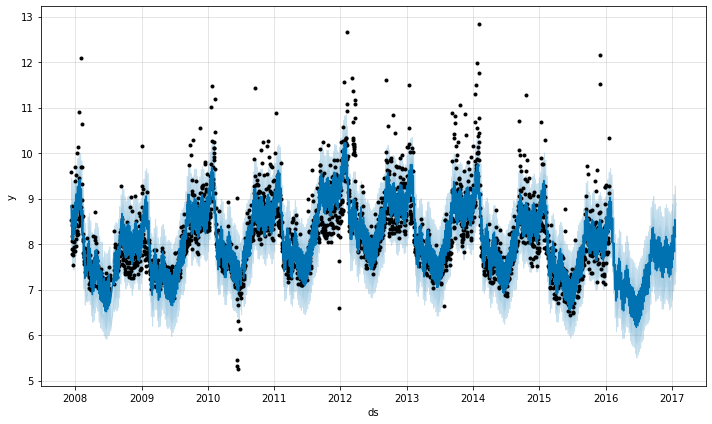

In [18]:
fig=m.plot(forecast)

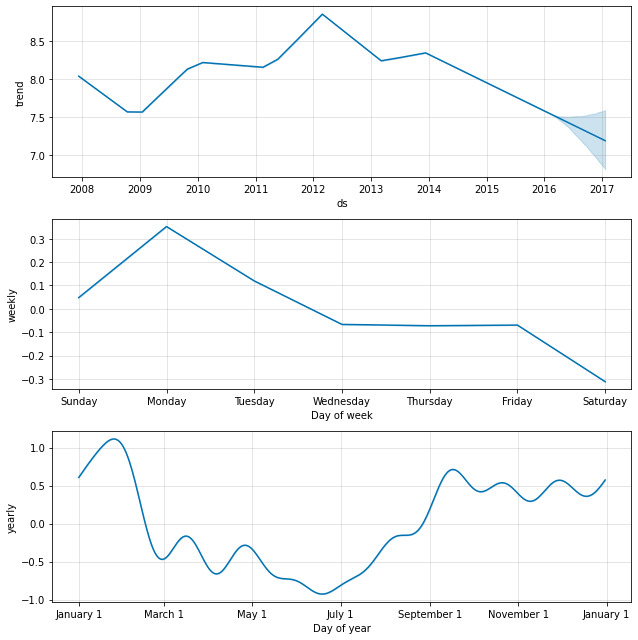

In [19]:
fig2=m.plot_components(forecast)

In [35]:
db2=pandas.read_csv('/SBK.JO.csv')

In [ ]:
print(db2)

In [37]:
m2=Prophet()
m2.fit(db2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
future2=m2.make_future_dataframe(periods=200,freq='D')

In [40]:
forecast2=m2.predict(future2)

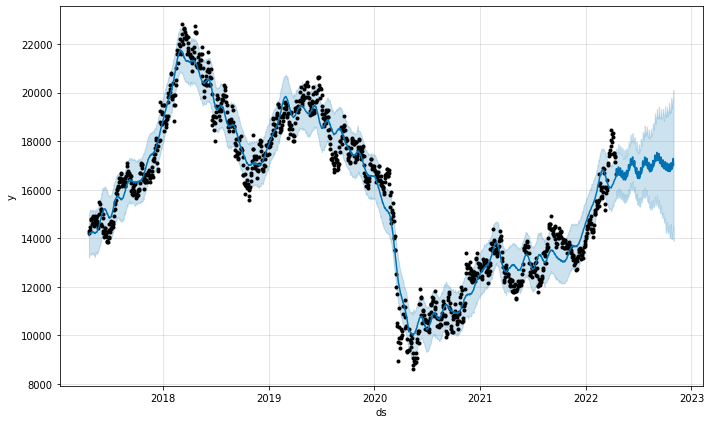

In [41]:
vodforeimg=m2.plot(forecast2)

In [31]:
db2.head()

,ds,y
0,2017/04/19,11059.571289
1,2017/04/20,11061.827148
2,2017/04/21,11106.935547
3,2017/04/24,11286.613281
4,2017/04/25,11282.854492


In [48]:
avg=sqldf.run("""
              select avg(y)/100 as R_Average_price,MAX(y)/100 as R_Max_price,Min(y)/100 as R_Min_price, 
              from db2
              """)
print(avg)

   R_Average_price  R_Max_price  R_Min_price
0       157.763145        228.4        86.35


In [60]:

summary=avg
summary.append([pow(db2['y'].var(),0.5),])

,R_Average_price,R_Max_price,R_Min_price,0
0,157.763145,228.4,86.35,NaN
0,NaN,NaN,NaN,0.003249


In [ ]:
summery.appe